### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Weight,Height
0,28.0,121.92
1,28.1,124.46
2,28.2,127.00
3,28.3,129.54
4,28.4,132.08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  35 non-null     float64
 1   Height  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [5]:
data.describe()

,Weight,Height
count,35.000000,35.000000
mean,62.808571,165.070857
std,25.004992,25.979902
min,28.000000,121.920000
25%,41.300000,143.510000
50%,62.600000,165.100000
75%,83.650000,186.690000
max,104.800000,208.000000


In [6]:
data.columns

Index(['Weight', 'Height'], dtype='object')

# EDA

Let's create some simple plots to check out the data!

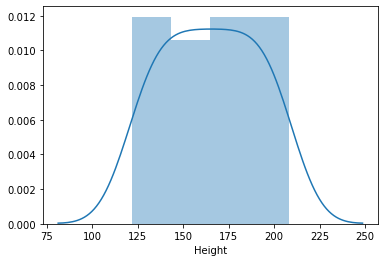

In [7]:
sns.distplot(data['Height'])

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [8]:
X = data[['Weight']]
y = data['Height']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [14]:
# Please run this cell twice 
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [15]:
# print the intercept
print(lm.intercept_)

100.01619842201642


In [16]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Weight,1.035785


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [17]:
predictions = lm.predict(X_test)

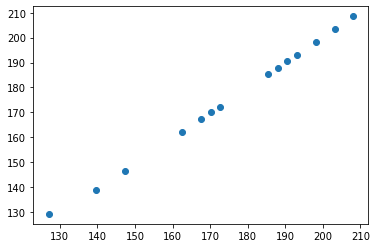

In [18]:
plt.scatter(y_test,predictions)

**Residual Histogram**

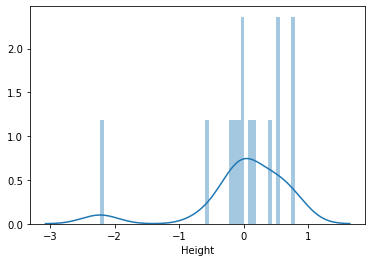

In [19]:
sns.distplot((y_test-predictions),bins=50);

In [20]:
from sklearn import metrics

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.46247498536980103
MSE: 0.5159664137283999
RMSE: 0.7183080214840983


In [22]:
x = [[97.30]]
lm.predict(x)

array([200.79806703])